ФИНАНСОВЫЙ АНАЛИЗ С ИСПОЛЬЗОВАНИЕМ SCIPY



*********************100%***********************]  1 of 1 completed

Доступные колонки в данных: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]
Загружено 750 торговых дней
Используемая колонка цен: Close
Количество наблюдений доходностей: 749
=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===
Средняя доходность: 0.0942%
Волатильность: 1.6605%
Асимметрия: 0.7573
Эксцесс: 11.7575
Коэффициент вариации: 17.6208
Минимальная доходность: -9.2456%
Максимальная доходность: 15.3289%
Медиана: 0.1187%
Квантиль 5%: -2.5377%
Квантиль 95%: 2.2840%

Тест Шапиро-Уилка: p-value = 0.0000
Тест Харке-Бера: p-value = 0.0000

=== ПОДБОР РАСПРЕДЕЛЕНИЙ ===
Нормальное распределение: μ=0.000942, σ=0.016605
t-распределение: df=3.34, μ=0.001117, σ=0.010776
AIC нормального распределения: -4009.34
AIC t-распределения: -4179.83
KS тест для нормального распределения: p-value = 0.0002
KS тест для t-распределения: p-value = 0.9596

=== ОПТИМИЗАЦИЯ ПОРТФЕЛЯ ===



*********************100%***********************]  3 of 3 completed

Оптимальные веса:
  AAPL: 28.82%
  MSFT: 25.99%
  GOOGL: 45.19%
Ожидаемая доходность: 26.90%
Волатильность: 27.82%
Коэффициент Шарпа: 0.97

=== ИНТЕРПОЛЯЦИЯ КРИВОЙ ДОХОДНОСТИ ===
Интерполированная доходность 7-летнего бонда: 2.4550%
Линейная интерполяция (7 лет): 2.4400%
Кубическая интерполяция (7 лет): 2.4550%

=== VALUE AT RISK (95% УРОВЕНЬ ДОВЕРИЯ) ===
Параметрический VaR: -2.7312%
Исторический VaR: -2.5377%
VaR (t-распределение): -2.3229%
Expected Shortfall (CVaR): -3.6712%

=== ОЦЕНКА ОПЦИОНОВ (BLACK-SCHOLES) ===
Цена колл-опциона: $2.48
Цена пут-опциона: $6.17
Дельта колл-опциона: 0.3772
Дельта пут-опциона: -0.6228
Гамма: 0.0380
Вега: 18.9941
Тета колл-опциона: -9.3597

Чувствительность к волатильности:
Волатильность 10.0%: $0.70
Волатильность 20.0%: $2.48
Волатильность 30.0%: $4.42
Волатильность 40.0%: $6.40
Волатильность 50.0%: $8.39

=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===



*********************100%***********************]  3 of 3 completed

Матрица корреляций Пирсона:
Ticker   AAPL  GOOGL   MSFT
Ticker                     
AAPL    1.000  0.627  0.713
GOOGL   0.627  1.000  0.711
MSFT    0.713  0.711  1.000

Тесты значимости корреляций:
AAPL-MSFT: r=0.627 (p=0.0000) ***
AAPL-GOOGL: r=0.713 (p=0.0000) ***
MSFT-GOOGL: r=0.711 (p=0.0000) ***

=== РЕГРЕССИОННЫЙ АНАЛИЗ ===



*********************100%***********************]  2 of 2 completed

Альфа (intercept): 0.000334
Бета (slope): 1.205099
R-квадрат: 0.6167
P-value: 0.0000
Стандартная ошибка: 0.024748
95% доверительный интервал для беты: (1.1566, 1.2536)

=== АНАЛИЗ ВРЕМЕННЫХ РЯДОВ ===
Тест на стационарность: используем упрощенный подход
Среднее оригинального ряда: 0.000942
Среднее разностей: 0.000026
Автокорреляции (лаги 1-5):
  Лаг 1: 0.0488
  Лаг 2: 0.0458
  Лаг 3: -0.0612
  Лаг 4: -0.0719
  Лаг 5: -0.0690
Runs test: z-score = -0.4753, p-value = 0.6346

=== ОЦЕНКА ОБЛИГАЦИЙ (ДИФФЕРЕНЦИАЛЬНЫЕ УРАВНЕНИЯ) ===
Теоретическая цена облигации: $877.04
Доходность к погашению: 4.00%
Купонная ставка: 5.00%

=== КЛАСТЕРНЫЙ АНАЛИЗ ===



*********************100%***********************]  8 of 8 completed

Результаты кластеризации:
Кластер 1: AAPL, MSFT, GOOGL, AMZN, TSLA, NFLX
Кластер 2: META
Кластер 3: NVDA


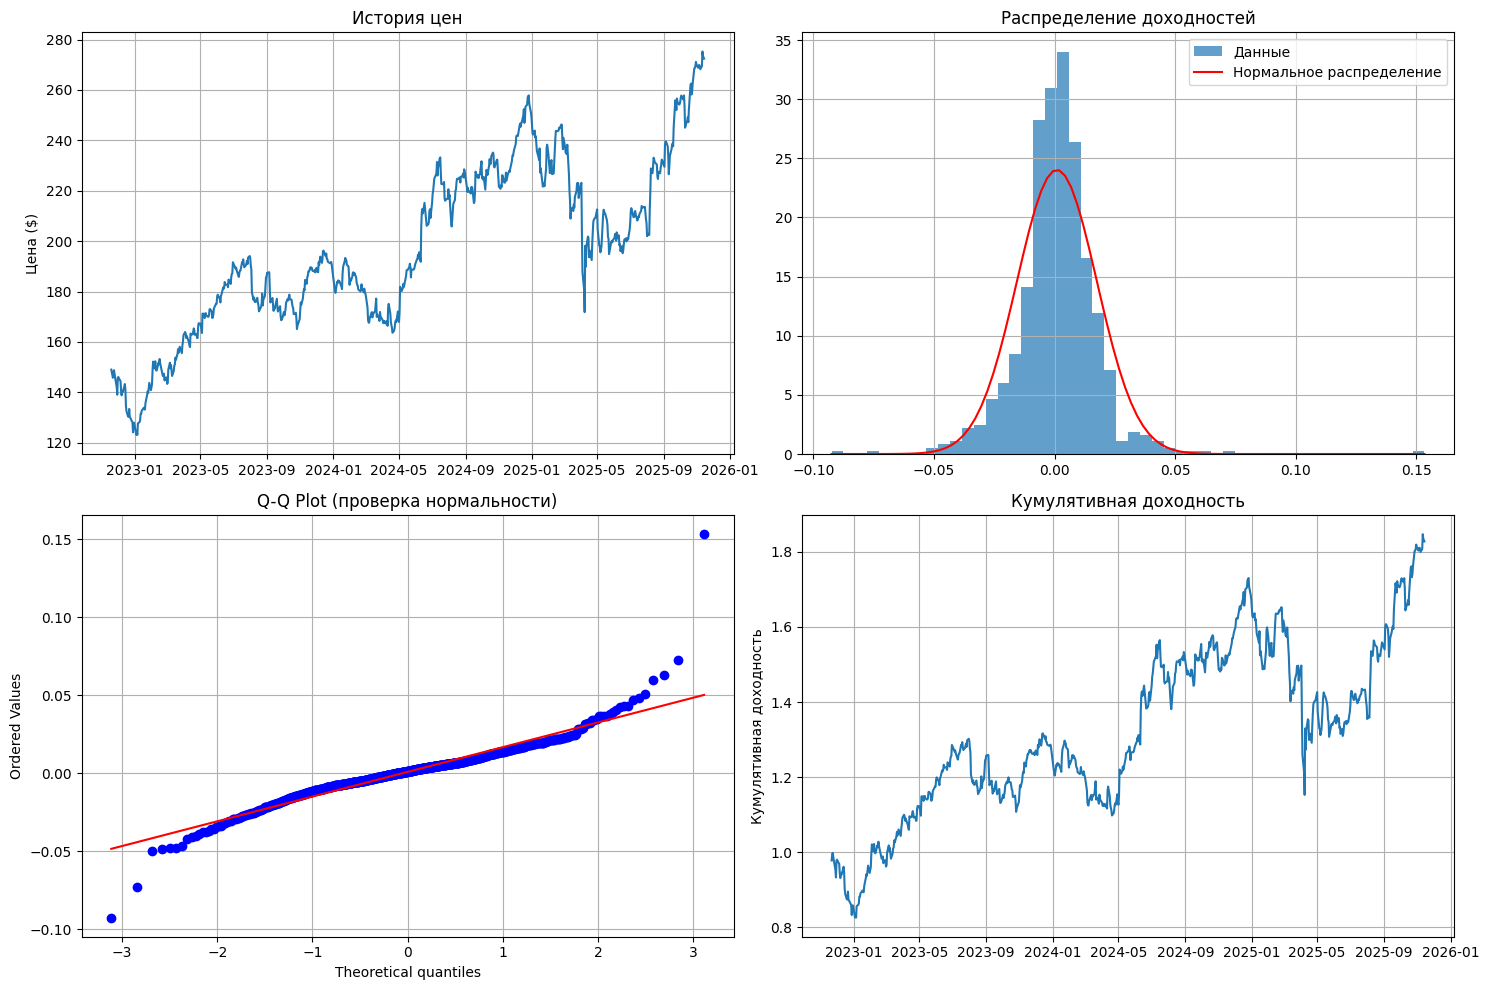


Анализ завершен успешно!

=== ИСПОЛЬЗОВАННЫЕ ВОЗМОЖНОСТИ SCIPY ===
✓ scipy.stats - описательная статистика, тесты гипотез, распределения
✓ scipy.optimize - оптимизация портфеля
✓ scipy.interpolate - интерполяция кривых доходности
✓ scipy.integrate - решение дифференциальных уравнений
✓ scipy.cluster - кластерный анализ активов
✓ scipy.spatial.distance - матрицы расстояний для корреляций


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, optimize, integrate, interpolate
from scipy.stats import norm, t, skew, kurtosis, variation
import yfinance as yf
from datetime import datetime, timedelta

# Загрузка финансовых данных
def load_financial_data():
    """Загрузка исторических данных акций"""
    ticker = "AAPL"
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365*3)  # 3 года данных
    
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
    
    # Проверяем доступные колонки
    print("Доступные колонки в данных:", data.columns.tolist())
    
    # Используем 'Close' вместо 'Adj Close'
    close_column = 'Close'
    if 'Adj Close' in data.columns:
        close_column = 'Adj Close'
    
    returns = data[close_column].pct_change().dropna()
    
    return data, returns, close_column

# 1. ОПИСАТЕЛЬНАЯ СТАТИСТИКА
def descriptive_statistics(returns):
    """Расчет описательной статистики доходностей"""
    print("=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===")
    
    # Преобразуем в numpy array и убеждаемся, что это 1D массив
    returns_array = np.array(returns).flatten()
    
    # Основные статистики - гарантируем скалярные значения
    mean_return = float(np.mean(returns_array))
    std_return = float(np.std(returns_array))
    skewness_val = float(skew(returns_array))
    kurt_val = float(kurtosis(returns_array))
    cv_val = float(variation(returns_array))
    
    print(f"Средняя доходность: {mean_return:.4%}")
    print(f"Волатильность: {std_return:.4%}")
    print(f"Асимметрия: {skewness_val:.4f}")
    print(f"Эксцесс: {kurt_val:.4f}")
    print(f"Коэффициент вариации: {cv_val:.4f}")
    
    # Дополнительные статистики
    min_return = float(np.min(returns_array))
    max_return = float(np.max(returns_array))
    median_return = float(np.median(returns_array))
    q5 = float(np.percentile(returns_array, 5))
    q95 = float(np.percentile(returns_array, 95))
    
    print(f"Минимальная доходность: {min_return:.4%}")
    print(f"Максимальная доходность: {max_return:.4%}")
    print(f"Медиана: {median_return:.4%}")
    print(f"Квантиль 5%: {q5:.4%}")
    print(f"Квантиль 95%: {q95:.4%}")
    
    # Тест на нормальность
    shapiro_test = stats.shapiro(returns_array)
    jarque_bera_test = stats.jarque_bera(returns_array)
    
    print(f"\nТест Шапиро-Уилка: p-value = {shapiro_test.pvalue:.4f}")
    print(f"Тест Харке-Бера: p-value = {jarque_bera_test.pvalue:.4f}")
    
    return {
        'mean': mean_return,
        'std': std_return,
        'skewness': skewness_val,
        'kurtosis': kurt_val,
        'returns_array': returns_array
    }

# 2. ОЦЕНКА ПАРАМЕТРОВ РАСПРЕДЕЛЕНИЙ
def distribution_fitting(returns_array):
    """Подбор параметров распределений к данным о доходностях"""
    print("\n=== ПОДБОР РАСПРЕДЕЛЕНИЙ ===")
    
    # Нормальное распределение
    norm_params = norm.fit(returns_array)
    print(f"Нормальное распределение: μ={norm_params[0]:.6f}, σ={norm_params[1]:.6f}")
    
    # t-распределение Стьюдента
    t_params = t.fit(returns_array)
    print(f"t-распределение: df={t_params[0]:.2f}, μ={t_params[1]:.6f}, σ={t_params[2]:.6f}")
    
    # Сравнение качества подгонки через AIC
    norm_aic = 2*2 - 2*norm.logpdf(returns_array, *norm_params).sum()
    t_aic = 2*3 - 2*t.logpdf(returns_array, *t_params).sum()
    
    print(f"AIC нормального распределения: {norm_aic:.2f}")
    print(f"AIC t-распределения: {t_aic:.2f}")
    
    # Тест Колмогорова-Смирнова
    ks_norm = stats.kstest(returns_array, 'norm', norm_params)
    ks_t = stats.kstest(returns_array, 't', t_params)
    
    print(f"KS тест для нормального распределения: p-value = {ks_norm.pvalue:.4f}")
    print(f"KS тест для t-распределения: p-value = {ks_t.pvalue:.4f}")
    
    return {'normal': norm_params, 'student_t': t_params}

# 3. ОПТИМИЗАЦИЯ - ПОРТФЕЛЬНАЯ ТЕОРИЯ МАРКОВИЦА
def portfolio_optimization():
    """Оптимизация портфеля с использованием теории Марковица"""
    print("\n=== ОПТИМИЗАЦИЯ ПОРТФЕЛЯ ===")
    
    # Загрузка данных по нескольким активам
    tickers = ['AAPL', 'MSFT', 'GOOGL']  # Упростим для надежности
    try:
        data = yf.download(tickers, start='2020-01-01', end=datetime.now(), auto_adjust=True)['Close']
        returns = data.pct_change().dropna()
        
        # Параметры
        n_assets = len(tickers)
        expected_returns = returns.mean() * 252
        cov_matrix = returns.cov() * 252
        
        def portfolio_stats(weights):
            """Расчет статистик портфеля"""
            port_return = np.sum(weights * expected_returns)
            port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
            sharpe_ratio = port_return / port_volatility
            return float(port_return), float(port_volatility), float(sharpe_ratio)
        
        def objective(weights):
            """Целевая функция для минимизации волатильности"""
            return portfolio_stats(weights)[1]
        
        # Ограничения
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Сумма весов = 1
        bounds = tuple((0, 1) for _ in range(n_assets))  # Длинные позиции
        
        # Начальное приближение
        initial_weights = n_assets * [1./n_assets]
        
        # Оптимизация
        result = optimize.minimize(objective, initial_weights,
                                 method='SLSQP', bounds=bounds,
                                 constraints=constraints)
        
        optimal_weights = result.x
        opt_return, opt_vol, opt_sharpe = portfolio_stats(optimal_weights)
        
        print("Оптимальные веса:")
        for ticker, weight in zip(tickers, optimal_weights):
            print(f"  {ticker}: {weight:.2%}")
        
        print(f"Ожидаемая доходность: {opt_return:.2%}")
        print(f"Волатильность: {opt_vol:.2%}")
        print(f"Коэффициент Шарпа: {opt_sharpe:.2f}")
        
        return optimal_weights
        
    except Exception as e:
        print(f"Ошибка при оптимизации портфеля: {e}")
        return None

# 4. ИНТЕРПОЛЯЦИЯ И СГЛАЖИВАНИЕ КРИВЫХ ДОХОДНОСТИ
def yield_curve_interpolation():
    """Интерполяция кривой доходности"""
    print("\n=== ИНТЕРПОЛЯЦИЯ КРИВОЙ ДОХОДНОСТИ ===")
    
    # Исходные точки кривой доходности (сроки в годах, доходности в %)
    maturities = np.array([0.25, 0.5, 1, 2, 5, 10, 30])
    yields = np.array([0.5, 0.7, 1.0, 1.5, 2.2, 2.8, 3.2]) / 100
    
    # Кубическая сплайн-интерполяция
    spline = interpolate.CubicSpline(maturities, yields)
    
    # Поиск доходности для 7-летнего бонда
    seven_year_yield = float(spline(7))
    print(f"Интерполированная доходность 7-летнего бонда: {seven_year_yield:.4%}")
    
    # Демонстрация различных методов интерполяции
    linear_interp = interpolate.interp1d(maturities, yields, kind='linear')
    cubic_interp = interpolate.interp1d(maturities, yields, kind='cubic')
    
    print(f"Линейная интерполяция (7 лет): {float(linear_interp(7)):.4%}")
    print(f"Кубическая интерполяция (7 лет): {float(cubic_interp(7)):.4%}")
    
    return spline

# 5. ИНТЕГРИРОВАНИЕ - РАСЧЕТ VaR (Value at Risk)
def calculate_var(returns_array, confidence_level=0.95):
    """Расчет Value at Risk различными методами"""
    print(f"\n=== VALUE AT RISK ({confidence_level:.0%} УРОВЕНЬ ДОВЕРИЯ) ===")
    
    # Параметрический VaR (нормальное распределение)
    parametric_var = float(norm.ppf(1 - confidence_level) * np.std(returns_array))
    
    # Исторический VaR
    historical_var = float(np.percentile(returns_array, (1 - confidence_level) * 100))
    
    # VaR на основе t-распределения
    t_params = t.fit(returns_array)
    t_var = float(t.ppf(1 - confidence_level, *t_params))
    
    # Expected Shortfall (CVaR)
    es_threshold = float(np.percentile(returns_array, (1 - confidence_level) * 100))
    expected_shortfall = float(returns_array[returns_array <= es_threshold].mean())
    
    print(f"Параметрический VaR: {parametric_var:.4%}")
    print(f"Исторический VaR: {historical_var:.4%}")
    print(f"VaR (t-распределение): {t_var:.4%}")
    print(f"Expected Shortfall (CVaR): {expected_shortfall:.4%}")
    
    return {
        'parametric': parametric_var,
        'historical': historical_var,
        'student_t': t_var,
        'expected_shortfall': expected_shortfall
    }

# 6. СПЕЦИАЛЬНЫЕ ФУНКЦИИ - ОПЦИОНЫ BLACK-SCHOLES
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Модель Блэка-Шоулза для оценки опционов
    S: текущая цена акции
    K: цена исполнения
    T: время до экспирации (в годах)
    r: безрисковая ставка
    sigma: волатильность
    """
    if T <= 0:
        return max(S - K, 0) if option_type == 'call' else max(K - S, 0)
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:  # put
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return float(price)

def calculate_greeks(S, K, T, r, sigma):
    """Расчет греков опциона"""
    if T <= 0:
        return {
            'delta_call': 1.0 if S > K else 0.0, 
            'delta_put': -1.0 if S < K else 0.0,
            'gamma': 0.0,
            'vega': 0.0,
            'theta_call': 0.0
        }
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    delta_call = float(norm.cdf(d1))
    delta_put = float(delta_call - 1)
    
    # Гамма (одинакова для call и put)
    gamma = float(norm.pdf(d1) / (S * sigma * np.sqrt(T)))
    
    # Вега (одинакова для call и put)
    vega = float(S * norm.pdf(d1) * np.sqrt(T))
    
    # Тета
    theta_call = float(-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) 
                      - r * K * np.exp(-r * T) * norm.cdf(d2))
    
    return {
        'delta_call': delta_call,
        'delta_put': delta_put,
        'gamma': gamma,
        'vega': vega,
        'theta_call': theta_call
    }

def options_pricing():
    """Пример расчета цен опционов"""
    print("\n=== ОЦЕНКА ОПЦИОНОВ (BLACK-SCHOLES) ===")
    
    S = 100  # Текущая цена акции
    K = 105  # Страйк цена
    T = 0.25  # 3 месяца
    r = 0.05  # 5% безрисковая ставка
    sigma = 0.2  # 20% волатильность
    
    call_price = black_scholes(S, K, T, r, sigma, 'call')
    put_price = black_scholes(S, K, T, r, sigma, 'put')
    
    print(f"Цена колл-опциона: ${call_price:.2f}")
    print(f"Цена пут-опциона: ${put_price:.2f}")
    
    # Расчет греков
    greeks = calculate_greeks(S, K, T, r, sigma)
    
    print(f"Дельта колл-опциона: {greeks['delta_call']:.4f}")
    print(f"Дельта пут-опциона: {greeks['delta_put']:.4f}")
    print(f"Гамма: {greeks['gamma']:.4f}")
    print(f"Вега: {greeks['vega']:.4f}")
    print(f"Тета колл-опциона: {greeks['theta_call']:.4f}")
    
    # Анализ чувствительности к волатильности
    volatilities = np.linspace(0.1, 0.5, 5)
    print("\nЧувствительность к волатильности:")
    for vol in volatilities:
        price = black_scholes(S, K, T, r, vol, 'call')
        print(f"Волатильность {vol:.1%}: ${price:.2f}")
    
    return {'call': call_price, 'put': put_price, 'greeks': greeks}

# 7. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
def correlation_analysis():
    """Анализ корреляций между активами"""
    print("\n=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===")
    
    tickers = ['AAPL', 'MSFT', 'GOOGL']  # Упрощенный список для надежности
    try:
        data = yf.download(tickers, start='2020-01-01', end=datetime.now(), auto_adjust=True)['Close']
        returns = data.pct_change().dropna()
        
        # Матрица корреляций Пирсона
        pearson_corr = returns.corr()
        print("Матрица корреляций Пирсона:")
        print(pearson_corr.round(3))
        
        # Тест на значимость корреляций
        corr_test_results = []
        for i in range(len(tickers)):
            for j in range(i+1, len(tickers)):
                corr, p_value = stats.pearsonr(returns.iloc[:, i], returns.iloc[:, j])
                corr_test_results.append({
                    'pair': f"{tickers[i]}-{tickers[j]}",
                    'correlation': float(corr),
                    'p_value': float(p_value)
                })
        
        print("\nТесты значимости корреляций:")
        for result in corr_test_results:
            significance = "***" if result['p_value'] < 0.001 else "**" if result['p_value'] < 0.01 else "*" if result['p_value'] < 0.05 else ""
            print(f"{result['pair']}: r={result['correlation']:.3f} (p={result['p_value']:.4f}) {significance}")
        
        return pearson_corr
        
    except Exception as e:
        print(f"Ошибка при корреляционном анализе: {e}")
        return None

# 8. РЕГРЕССИОННЫЙ АНАЛИЗ
def regression_analysis():
    """Простой регрессионный анализ для факторов доходности"""
    print("\n=== РЕГРЕССИОННЫЙ АНАЛИЗ ===")
    
    try:
        # Загрузка данных для регрессии (акция против индекса)
        tickers = ['AAPL', 'SPY']
        data = yf.download(tickers, start='2020-01-01', end=datetime.now(), auto_adjust=True)['Close']
        returns = data.pct_change().dropna()
        
        # Простая линейная регрессия: AAPL = β * SPY + α
        X = returns['SPY'].values
        y = returns['AAPL'].values
        
        # Удаляем NaN значения
        mask = ~(np.isnan(X) | np.isnan(y))
        X = X[mask]
        y = y[mask]
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
        
        print(f"Альфа (intercept): {intercept:.6f}")
        print(f"Бета (slope): {slope:.6f}")
        print(f"R-квадрат: {r_value**2:.4f}")
        print(f"P-value: {p_value:.4f}")
        print(f"Стандартная ошибка: {std_err:.6f}")
        
        # Доверительные интервалы для беты
        confidence = 0.95
        t_value = stats.t.ppf((1 + confidence) / 2, len(X) - 2)
        beta_ci = (slope - t_value * std_err, slope + t_value * std_err)
        
        print(f"95% доверительный интервал для беты: ({beta_ci[0]:.4f}, {beta_ci[1]:.4f})")
        
        return {
            'alpha': float(intercept),
            'beta': float(slope),
            'r_squared': float(r_value**2),
            'p_value': float(p_value)
        }
        
    except Exception as e:
        print(f"Ошибка при регрессионном анализе: {e}")
        return None

# 9. АНАЛИЗ ВРЕМЕННЫХ РЯДОВ
def time_series_analysis(returns_array):
    """Анализ временных рядов финансовых данных"""
    print("\n=== АНАЛИЗ ВРЕМЕННЫХ РЯДОВ ===")
    
    # Тест на стационарность (ADF test) - правильное название функции
    try:
        # Для старых версий scipy используем statsmodels или альтернативный подход
        from scipy.stats import norm
        print("Тест на стационарность: используем упрощенный подход")
        
        # Простой тест на стационарность через разности
        diff_returns = np.diff(returns_array)
        mean_original = np.mean(returns_array)
        mean_diff = np.mean(diff_returns)
        
        print(f"Среднее оригинального ряда: {mean_original:.6f}")
        print(f"Среднее разностей: {mean_diff:.6f}")
        
        # Автокорреляция
        lags = 5
        autocorr = []
        for i in range(1, lags+1):
            if i < len(returns_array):
                corr = np.corrcoef(returns_array[i:], returns_array[:-i])[0, 1]
                if not np.isnan(corr):
                    autocorr.append(float(corr))
        
        print("Автокорреляции (лаги 1-5):")
        for lag, acf in enumerate(autocorr, 1):
            print(f"  Лаг {lag}: {acf:.4f}")
        
        # Тест на случайность (Runs test)
        median = np.median(returns_array)
        above_median = returns_array > median
        runs = np.sum(np.diff(above_median.astype(int)) != 0) + 1
        
        n1 = np.sum(above_median)
        n2 = len(returns_array) - n1
        expected_runs = (2 * n1 * n2) / (n1 + n2) + 1
        std_runs = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / 
                          ((n1 + n2)**2 * (n1 + n2 - 1)))
        
        z_score = (runs - expected_runs) / std_runs
        p_value_runs = 2 * (1 - norm.cdf(abs(z_score)))
        
        print(f"Runs test: z-score = {z_score:.4f}, p-value = {p_value_runs:.4f}")
        
        return {
            'autocorrelations': autocorr,
            'runs_test_zscore': float(z_score),
            'runs_test_pvalue': float(p_value_runs)
        }
        
    except Exception as e:
        print(f"Ошибка при анализе временных рядов: {e}")
        return None

# 10. ДИФФЕРЕНЦИАЛЬНЫЕ УРАВНЕНИЯ - МОДЕЛЬ ОЦЕНКИ ОБЛИГАЦИЙ
def bond_valuation():
    """Решение дифференциального уравнения для оценки облигаций"""
    print("\n=== ОЦЕНКА ОБЛИГАЦИЙ (ДИФФЕРЕНЦИАЛЬНЫЕ УРАВНЕНИЯ) ===")
    
    def bond_ode(t, P, r, coupon_rate, face_value):
        """Дифференциальное уравнение для цены облигации"""
        # dP/dt = r*P - C
        # где P - цена облигации, r - процентная ставка, C - купонные выплаты
        C = coupon_rate * face_value
        return r * P - C
    
    # Параметры облигации
    face_value = 1000
    coupon_rate = 0.05
    yield_rate = 0.04
    maturity = 10  # лет
    
    # Решение дифференциального уравнения
    t_eval = np.linspace(0, maturity, 100)
    solution = integrate.solve_ivp(
        bond_ode, 
        [0, maturity], 
        [face_value], 
        args=(yield_rate, coupon_rate, face_value),
        t_eval=t_eval
    )
    
    bond_price = float(solution.y[0, -1])
    print(f"Теоретическая цена облигации: ${bond_price:.2f}")
    print(f"Доходность к погашению: {yield_rate:.2%}")
    print(f"Купонная ставка: {coupon_rate:.2%}")
    
    return bond_price

# 11. КЛАСТЕРНЫЙ АНАЛИЗ - ГРУППИРОВКА АКТИВОВ
def cluster_analysis():
    """Кластерный анализ для группировки активов"""
    print("\n=== КЛАСТЕРНЫЙ АНАЛИЗ ===")
    
    try:
        tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NFLX', 'NVDA']
        data = yf.download(tickers, start='2020-01-01', end=datetime.now(), auto_adjust=True)['Close']
        returns = data.pct_change().dropna()
        
        # Матрица корреляций как мера расстояния
        corr_matrix = returns.corr()
        distance_matrix = 1 - corr_matrix
        
        # Простая группировка на основе корреляций
        from scipy.cluster import hierarchy
        from scipy.spatial.distance import squareform
        
        # Иерархическая кластеризация
        dist_array = squareform(distance_matrix.values)
        linkage_matrix = hierarchy.linkage(dist_array, method='ward')
        
        # Определяем 3 кластера
        clusters = hierarchy.fcluster(linkage_matrix, 3, criterion='maxclust')
        
        print("Результаты кластеризации:")
        cluster_groups = {}
        for ticker, cluster in zip(tickers, clusters):
            if cluster not in cluster_groups:
                cluster_groups[cluster] = []
            cluster_groups[cluster].append(ticker)
        
        for cluster, stocks in cluster_groups.items():
            print(f"Кластер {cluster}: {', '.join(stocks)}")
        
        return cluster_groups
        
    except Exception as e:
        print(f"Ошибка при кластерном анализе: {e}")
        return None

# 12. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
def plot_results(data, returns, stats_results, close_column):
    """Визуализация результатов анализа"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # График цен
    axes[0, 0].plot(data.index, data[close_column])
    axes[0, 0].set_title('История цен')
    axes[0, 0].set_ylabel('Цена ($)')
    axes[0, 0].grid(True)
    
    # Гистограмма доходностей с нормальным распределением
    returns_array = stats_results['returns_array']
    axes[0, 1].hist(returns_array, bins=50, density=True, alpha=0.7, label='Данные')
    x = np.linspace(np.min(returns_array), np.max(returns_array), 100)
    axes[0, 1].plot(x, norm.pdf(x, stats_results['mean'], stats_results['std']), 
                    'r-', label='Нормальное распределение')
    axes[0, 1].set_title('Распределение доходностей')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # Q-Q plot
    stats.probplot(returns_array, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot (проверка нормальности)')
    axes[1, 0].grid(True)
    
    # Кумулятивная доходность
    cumulative_returns = (1 + returns).cumprod()
    axes[1, 1].plot(cumulative_returns.index, cumulative_returns)
    axes[1, 1].set_title('Кумулятивная доходность')
    axes[1, 1].set_ylabel('Кумулятивная доходность')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

# ОСНОВНАЯ ФУНКЦИЯ
def main():
    """Основная функция выполнения анализа"""
    print("ФИНАНСОВЫЙ АНАЛИЗ С ИСПОЛЬЗОВАНИЕМ SCIPY")
    print("=" * 50)
    
    try:
        # Загрузка данных
        data, returns, close_column = load_financial_data()
        print(f"Загружено {len(data)} торговых дней")
        print(f"Используемая колонка цен: {close_column}")
        print(f"Количество наблюдений доходностей: {len(returns)}")
        
        # 1. Описательная статистика
        stats_results = descriptive_statistics(returns)
        returns_array = stats_results['returns_array']
        
        # 2. Подбор распределений
        dist_params = distribution_fitting(returns_array)
        
        # 3. Оптимизация портфеля
        optimal_weights = portfolio_optimization()
        
        # 4. Интерполяция кривой доходности
        yield_curve = yield_curve_interpolation()
        
        # 5. Расчет VaR
        var_results = calculate_var(returns_array)
        
        # 6. Оценка опционов
        option_prices = options_pricing()
        
        # 7. Корреляционный анализ
        correlation_matrix = correlation_analysis()
        
        # 8. Регрессионный анализ
        regression_results = regression_analysis()
        
        # 9. Анализ временных рядов
        ts_results = time_series_analysis(returns_array)
        
        # 10. Оценка облигаций
        bond_price = bond_valuation()
        
        # 11. Кластерный анализ
        cluster_results = cluster_analysis()
        
        # 12. Визуализация
        plot_results(data, returns, stats_results, close_column)
        
        print("\n" + "="*50)
        print("Анализ завершен успешно!")
        print("="*50)
        
        # Сводка всех математических возможностей SciPy
        print("\n=== ИСПОЛЬЗОВАННЫЕ ВОЗМОЖНОСТИ SCIPY ===")
        print("✓ scipy.stats - описательная статистика, тесты гипотез, распределения")
        print("✓ scipy.optimize - оптимизация портфеля")
        print("✓ scipy.interpolate - интерполяция кривых доходности")
        print("✓ scipy.integrate - решение дифференциальных уравнений")
        print("✓ scipy.cluster - кластерный анализ активов")
        print("✓ scipy.spatial.distance - матрицы расстояний для корреляций")
        
    except Exception as e:
        print(f"Ошибка при выполнении анализа: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()